 <center> <h1> Data Preparation and Separation into Train and Test </h1> <center>

<center> <h1> Imports </h1> </center>

In [2]:
import warnings;
warnings.simplefilter('ignore');
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
from pandas_profiling import ProfileReport
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [3]:
from time import time

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

In [5]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

<h3> Read CSV and show datatypes <h3>

In [6]:
data = pd.read_csv('apples.csv', delimiter=";")
data.dtypes

Unnamed: 0         int64
date              object
average_price    float64
total_volume       int64
gala               int64
fuji               int64
granny_smith       int64
total_bags         int64
s_bags             int64
l_bags             int64
xl_bags            int64
type              object
region            object
dtype: object

<h3> Changing the date into the datetime format <h3>

In [7]:
data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True)
data = data.drop(['Unnamed: 0'], axis = 1)
data.dtypes

date             datetime64[ns]
average_price           float64
total_volume              int64
gala                      int64
fuji                      int64
granny_smith              int64
total_bags                int64
s_bags                    int64
l_bags                    int64
xl_bags                   int64
type                     object
region                   object
dtype: object

 <center> <h1> Cleaning Data </h1> <center>

<h3> Defining dates <h3>

In [8]:
#data["year"] = data["date"].dt.year
#data["month"] = data["date"].dt.month
#data["week"] = data["date"].dt.isocalendar().week
#data["day"] = data["date"].dt.day
data["date"] = data["date"].apply(lambda x: x.toordinal())

<h3> Using only the region "TotalUS" and dropping the collumn <h3>

In [9]:
data_to_use = data.where(data['region'] == 'TotalUS')
data_to_use = data_to_use.dropna()
data_to_use.drop('region', axis=1, inplace=True)


<h3> Sorting and dealing with categorical variables </h3>


In [10]:
data_to_use = data_to_use.sort_values(by='date')


In [11]:
data_to_use['type']=data_to_use['type'].astype('category')
data_to_use['type_new']=data_to_use['type'].cat.codes

data_to_use= data_to_use.drop('type',axis=1)

<h3> Separating the target from the rest </h3>


In [12]:
data_to_useY = data_to_use['average_price']
data_to_useY.head()

2703     0.95
11829    1.46
2702     1.01
11828    1.42
2701     1.03
Name: average_price, dtype: float64

In [13]:
data_to_useX = data_to_use.drop('average_price',axis=1)
data_to_useX.head()

,date,total_volume,gala,fuji,granny_smith,total_bags,s_bags,l_bags,xl_bags,type_new
2703,735602.0,3.132428e+09,1.235716e+09,1.362408e+09,84409332.0,449894002.0,358532158.0,89494563.0,1867281.0,0
11829,735602.0,6.129102e+07,2.332861e+07,2.166112e+07,437099.0,15864183.0,11506871.0,4357312.0,0.0,1
2702,735609.0,2.906354e+09,1.154481e+09,1.213477e+09,86657466.0,451738418.0,378326116.0,71833387.0,1578915.0,0
11828,735609.0,6.695289e+07,2.709667e+07,2.609716e+07,383042.0,13376012.0,10684449.0,2691563.0,0.0,1
2701,735616.0,2.904346e+09,1.185814e+09,1.170195e+09,83130190.0,465206981.0,387304126.0,77109320.0,793535.0,0


In [14]:
data_to_use.count

<bound method DataFrame.count of            date  average_price  total_volume          gala          fuji  \
2703   735602.0           0.95  3.132428e+09  1.235716e+09  1.362408e+09   
11829  735602.0           1.46  6.129102e+07  2.332861e+07  2.166112e+07   
2702   735609.0           1.01  2.906354e+09  1.154481e+09  1.213477e+09   
11828  735609.0           1.42  6.695289e+07  2.709667e+07  2.609716e+07   
2701   735616.0           1.03  2.904346e+09  1.185814e+09  1.170195e+09   
...         ...            ...           ...           ...           ...   
18215  736764.0           1.52  1.663957e+08  1.291697e+07  4.087635e+07   
18214  736771.0           1.54  1.675448e+08  1.708018e+07  4.449497e+07   
9091   736771.0           1.05  4.138631e+09  1.370739e+09  1.106105e+09   
9090   736778.0           1.03  4.340984e+09  1.413080e+09  1.212571e+09   
18213  736778.0           1.55  1.558792e+08  1.210079e+07  3.428531e+07   

       granny_smith    total_bags        s_bags       

<h3> Training and testing spliting </h3>


In [15]:
train_X, test_X, train_Y, test_Y = train_test_split(data_to_useX, data_to_useY, test_size=0.2, shuffle=False)


In [16]:
test_X

,date,total_volume,gala,fuji,granny_smith,total_bags,s_bags,l_bags,xl_bags,type_new
17465,736547.0,1.059779e+08,1.125920e+07,2.360152e+07,155251.0,7.096193e+07,5.984798e+07,11113948.0,0.0,1
8340,736547.0,3.252992e+09,1.129258e+09,1.098831e+09,66531255.0,9.583714e+08,6.889926e+08,237626993.0,31751795.0,0
8339,736554.0,3.281725e+09,1.095270e+09,1.115431e+09,62496341.0,1.008528e+09,6.687662e+08,311888917.0,27872565.0,0
17464,736554.0,1.014526e+08,9.800724e+06,2.301061e+07,141421.0,6.849980e+07,6.125446e+07,7244902.0,440.0,1
8338,736561.0,2.991374e+09,1.050793e+09,8.837219e+08,58107435.0,9.987522e+08,6.837126e+08,291155448.0,23884136.0,0
...,...,...,...,...,...,...,...,...,...,...
18215,736764.0,1.663957e+08,1.291697e+07,4.087635e+07,140187.0,1.124622e+08,9.445725e+07,18004900.0,0.0,1
18214,736771.0,1.675448e+08,1.708018e+07,4.449497e+07,104538.0,1.058652e+08,8.373518e+07,22112946.0,17019.0,1
9091,736771.0,4.138631e+09,1.370739e+09,1.106105e+09,64538085.0,1.597249e+09,1.171281e+09,398810174.0,27158314.0,0
9090,736778.0,4.340984e+09,1.413080e+09,1.212571e+09,75880112.0,1.639452e+09,1.254033e+09,354472939.0,30946753.0,0


In [17]:
train_X = train_X.values
train_Y = train_Y.values


In [18]:
sk.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

 <center> <h1> Machine Learning </h1> <center>

<h3> Decision Tree Regressors with grid search </h3>


In [24]:

from sklearn.model_selection import GridSearchCV
search_space = {
    
 "max_depth" : [1,2,4,6,10],
 "min_samples_leaf" :[1,2,3,4,5], 
 "min_samples_split" : [1,2,3], 
 "splitter" : ["random","best"],
 "max_features" : [1,2,3,4,5,6,7,8]
 }

GSDTR = GridSearchCV(DecisionTreeRegressor(),
 param_grid = search_space,
 scoring = ["r2","neg_mean_squared_error"],
 refit = "r2",
 cv = 5,
 verbose = 4
 )

GSDTR.fit(train_X,train_Y)



Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
[CV 1/5] END max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=1, splitter=random; neg_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 2/5] END max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=1, splitter=random; neg_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 3/5] END max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=1, splitter=random; neg_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 4/5] END max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=1, splitter=random; neg_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 5/5] END max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=1, splitter=random; neg_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 1/5] END max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=1, splitte

DecisionTreeRegressor(max_depth=2, max_features=3, min_samples_split=3,
                      splitter='random')

In [25]:
print(GSDTR.best_params_)
print(GSDTR.best_score_)

{'max_depth': 2, 'max_features': 5, 'min_samples_leaf': 4, 'min_samples_split': 3, 'splitter': 'random'}
0.6644437281811537


<h3> Decision Tree Regressors with the best found hyperparameters </h3>


In [26]:
regression_tree = DecisionTreeRegressor(max_depth= 2,max_features =5,min_samples_leaf = 4,min_samples_split = 3,splitter = "random")
regression_tree.fit(train_X, train_Y)

prediction_result = regression_tree.predict(test_X)
prediction_result

array([1.508     , 1.08683544, 1.08683544, 1.508     , 1.08683544,
       1.508     , 1.508     , 1.08683544, 1.08683544, 1.508     ,
       1.08683544, 1.508     , 1.08683544, 1.508     , 1.08683544,
       1.508     , 1.08683544, 1.508     , 1.08683544, 1.508     ,
       1.08683544, 1.508     , 1.508     , 1.08683544, 1.08683544,
       1.508     , 1.508     , 1.08683544, 1.508     , 1.08683544,
       1.508     , 1.08683544, 1.508     , 1.08683544, 1.508     ,
       1.08683544, 1.508     , 1.00732143, 1.508     , 1.08683544,
       1.08683544, 1.508     , 1.00732143, 1.508     , 1.00732143,
       1.508     , 1.508     , 1.00732143, 1.508     , 1.00732143,
       1.508     , 1.00732143, 1.00732143, 1.508     , 1.00732143,
       1.508     , 1.00732143, 1.434     , 1.00732143, 1.508     ,
       1.00732143, 1.508     , 1.00732143, 1.508     , 1.508     ,
       1.00732143, 1.00732143, 1.508     ])

In [27]:
plotting_test_X = test_X.copy()

plotting_test_X["date"] = (plotting_test_X["date"]).astype(int)
plotting_test_X["date"] = plotting_test_X["date"].apply(lambda x: dt.fromordinal(x)).dt.strftime('%d-%m-%Y')

In [28]:
plotting_test_X['predicted result'] = prediction_result

<h3> Decision Tree Regressor graphs: True Result and Predicted Result (for a specific tre) </h3>


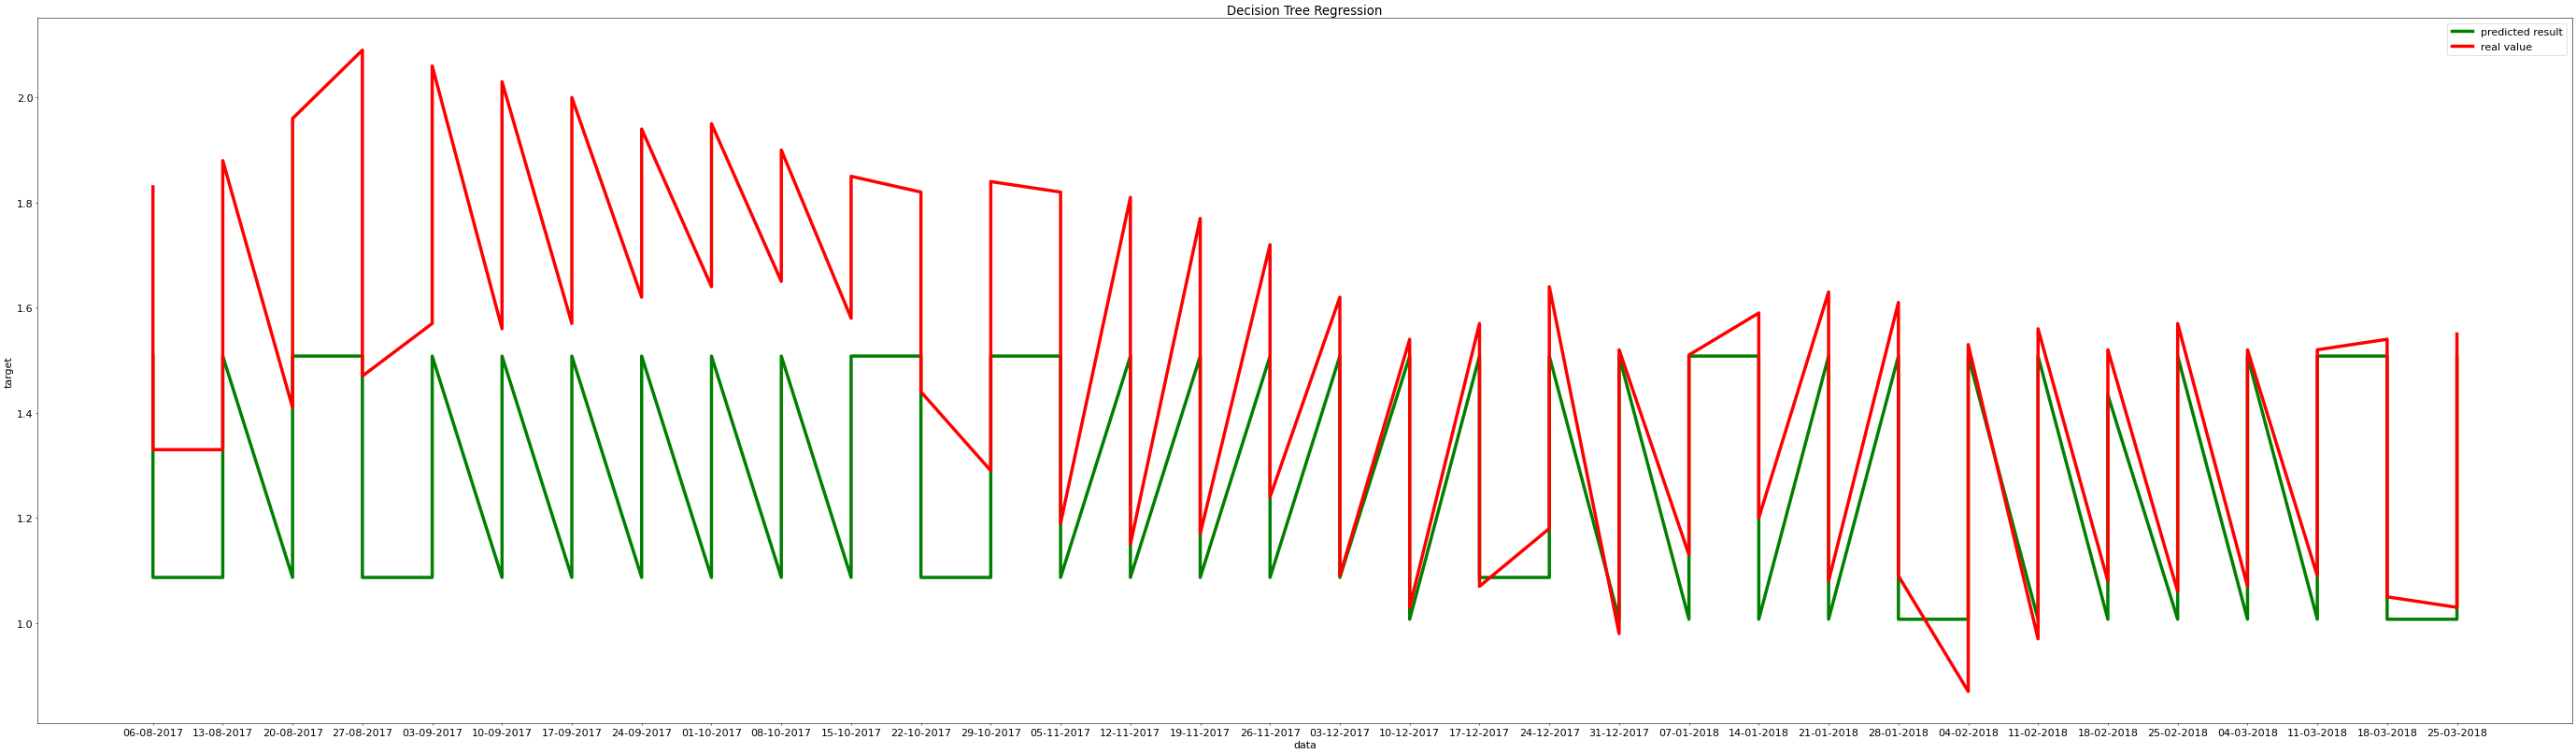

In [29]:
plt.rcParams["figure.figsize"] = (70,20)
plt.rcParams["figure.dpi"] = 50
plt.rcParams.update({'font.size': 16})

plt.figure()
plt.plot(plotting_test_X['date'],plotting_test_X['predicted result'], color = 'green',  linewidth=5, label= 'predicted result')
plot_A = plotting_test_X.copy()
plot_A['true result'] = test_Y

plt.plot(plot_A['date'],plot_A['true result'], color = 'red' ,linewidth=5, label= 'real value')
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

<h5> Results of the regression tree </h5>


In [43]:
r2_A = r2_score(plot_A['true result'], plot_A['predicted result'])
msq_A = mean_squared_error(plot_A['true result'], plot_A['predicted result'])
r2_result_A = f'R2 score is: {r2_A}'
msq_result_A = f'Mean Square Error is: {msq_A}'

print(r2_result_A)
print(msq_result_A)

R2 score is: 0.21702172365303385
Mean Square Error is: 0.07925032138518956


<h3> Decision Tree Regressor graphs: True Result and Predicted Result (for conventional apples) </h3>


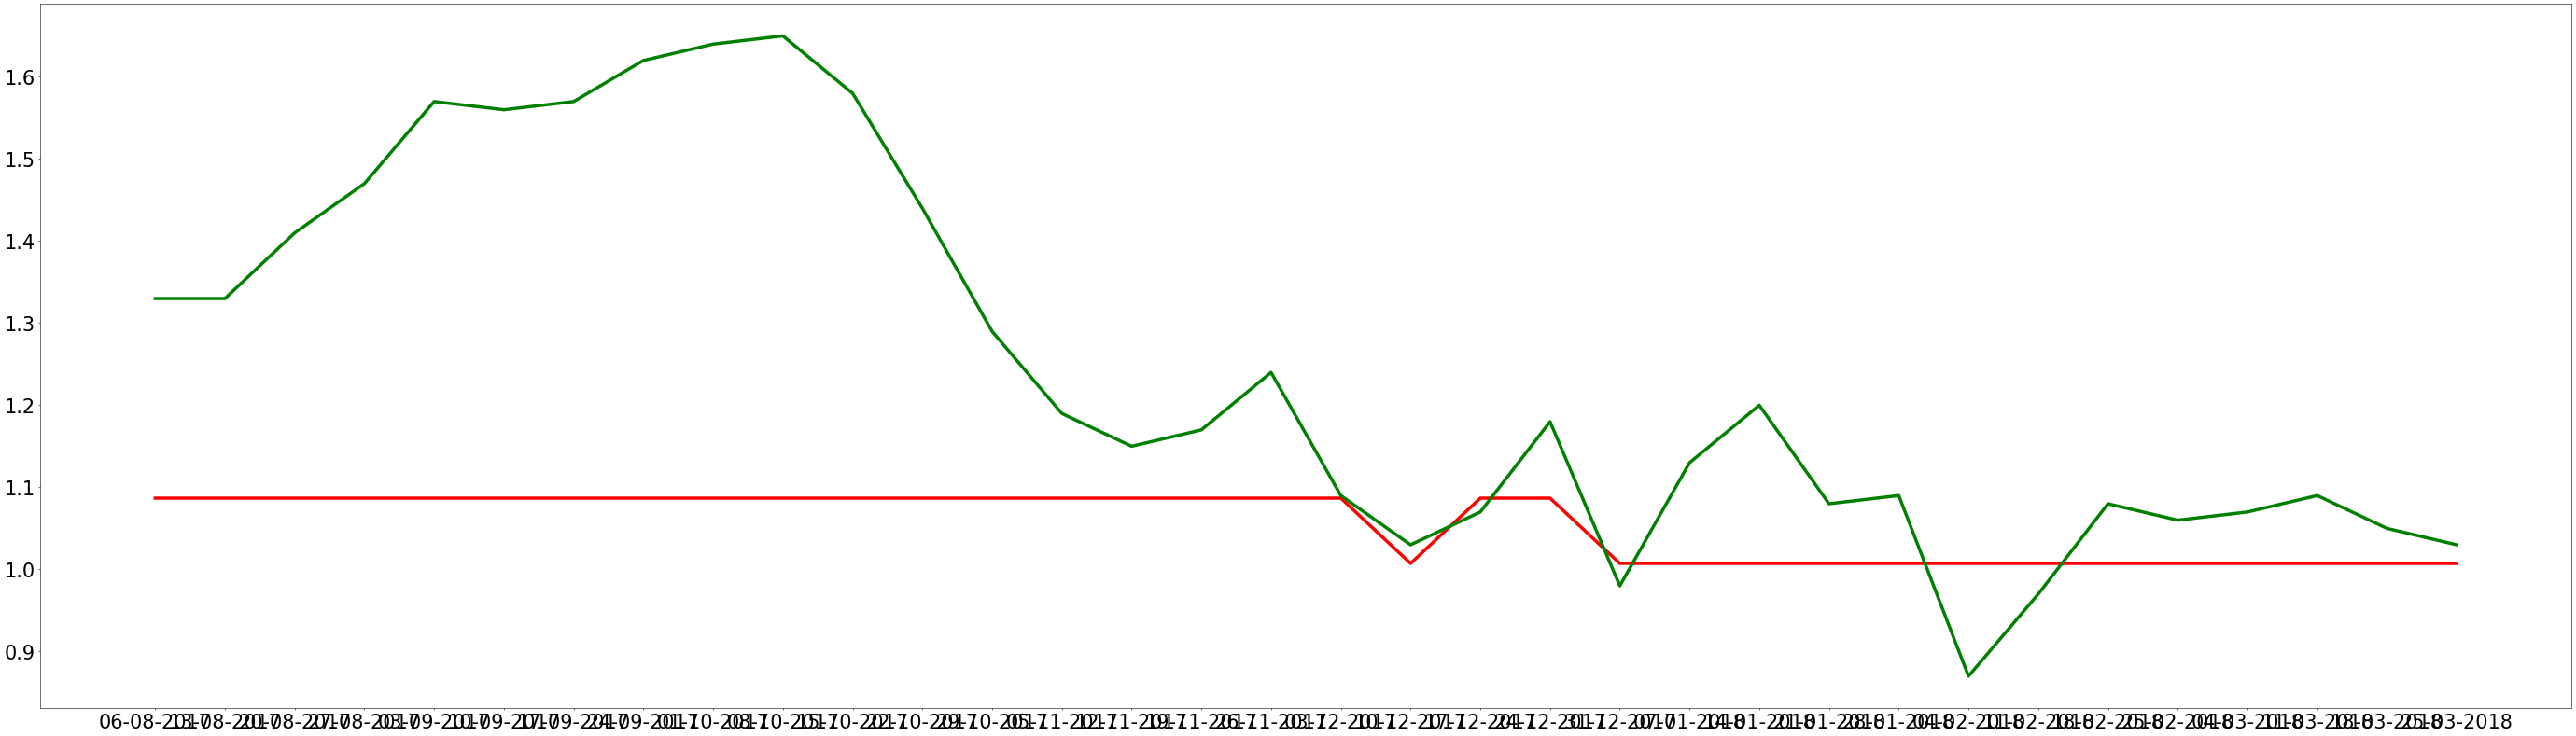

In [34]:
plt.rcParams["figure.figsize"] = (70,20)
plt.rcParams["figure.dpi"] = 50
plt.rcParams.update({'font.size': 30})

plot_B = plot_A.where(plot_A['type_new'] == 0)
plot_B = plot_B.dropna()
plot_B
plt.plot(plot_B['date'],plot_B['predicted result'], color = 'red',linewidth=5)
plt.plot(plot_B['date'],plot_B['true result'],color = 'green',linewidth=5)
plt.show()



<h5> Results of the regression tree (for conventional apples) </h5>

In [45]:
r2_B = r2_score(plot_B['true result'], plot_B['predicted result'])
msq_B = mean_squared_error(plot_B['true result'], plot_B['predicted result'])
r2_result_B = f'R2 score is: {r2_B}'
msq_result_B = f'Mean Square Error is: {msq_B}'
print(r2_result_B)
print(msq_result_B)

R2 score is: -0.5001118045520965
Mean Square Error is: 0.07464276041743807


<h3> Ridge with grid search </h3>


In [35]:

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = Ridge()
search_spacelinear = {
 'solver':['svd', 'cholesky', 'lsqr', 'sag'],
 'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
 'fit_intercept':[True, False],
 'normalize':[True, False]
}
search = GridSearchCV(model, search_spacelinear, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

result =  search.fit(train_X,train_Y)


In [36]:
print(result.best_score_)
print(result.best_params_)

-0.09572658170335423
{'alpha': 0.01, 'fit_intercept': True, 'normalize': True, 'solver': 'cholesky'}


<h3> Multiple model testing to get a general idea of what model to use </h3>


In [38]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

In [40]:
head = 10
for model in regressors[:head]:
    start = time()
    model.fit(train_X, train_Y)
    train_time = time() - start
    start = time()
    y_pred = model.predict(test_X)
    predict_time = time()-start    
    print(model)
    print("\tExplained variance:", explained_variance_score(test_Y, y_pred))
    print("\tMean absolute error:", mean_absolute_error(test_Y, y_pred))
    print("\tR2 score:", r2_score(test_Y, y_pred))
    print()

KNeighborsRegressor()
	Explained variance: 0.7666431907177629
	Mean absolute error: 0.1476764705882353
	R2 score: 0.6685991413708368

GradientBoostingRegressor()
	Explained variance: 0.8346267742859663
	Mean absolute error: 0.1040392210445581
	R2 score: 0.8345988161600024

KNeighborsRegressor()
	Explained variance: 0.7666431907177629
	Mean absolute error: 0.1476764705882353
	R2 score: 0.6685991413708368

ExtraTreesRegressor()
	Explained variance: 0.7768454937352707
	Mean absolute error: 0.12280735294117683
	R2 score: 0.7631290591038801

RandomForestRegressor()
	Explained variance: 0.8017091334631414
	Mean absolute error: 0.12080588235294112
	R2 score: 0.8015487232629193

DecisionTreeRegressor()
	Explained variance: 0.7766718067043841
	Mean absolute error: 0.13029411764705878
	R2 score: 0.7507962713965555

LinearRegression()
	Explained variance: 0.6453707510750855
	Mean absolute error: 0.16203730337178412
	R2 score: 0.5670916602421283

Lasso()
	Explained variance: 0.640767031871273
	Mea

<h3> Gradient Boosting Regressor with grid search </h3>

In [49]:
from sklearn.model_selection import GridSearchCV
search_space = {
 "n_estimators": [1, 2, 5, 10, 20, 50, 100, 200, 500],
 "max_leaf_nodes": [2, 5, 10, 20, 50, 100],
 "max_depth" : [1,2,4,6,10],
 "learning_rate":[0.01,0.1,1,10,100]
 }

GSGBR = GridSearchCV(GradientBoostingRegressor(),
 param_grid = search_space,
 scoring = ["neg_mean_squared_error"],
 refit = "neg_mean_squared_error",
 cv = 5,
 verbose = 4
 )

GBR_result = GSGBR.fit(train_X,train_Y)
print(GBR_result.best_score_)
print(GBR_result.best_params_)

Fitting 5 folds for each of 1350 candidates, totalling 6750 fits
[CV 1/5] END learning_rate=0.01, max_depth=1, max_leaf_nodes=2, n_estimators=1; neg_mean_squared_error: (test=-0.069) total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=1, max_leaf_nodes=2, n_estimators=1; neg_mean_squared_error: (test=-0.097) total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=1, max_leaf_nodes=2, n_estimators=1; neg_mean_squared_error: (test=-0.076) total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=1, max_leaf_nodes=2, n_estimators=1; neg_mean_squared_error: (test=-0.070) total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=1, max_leaf_nodes=2, n_estimators=1; neg_mean_squared_error: (test=-0.070) total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=1, max_leaf_nodes=2, n_estimators=2; neg_mean_squared_error: (test=-0.068) total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=1, max_leaf_nodes=2, n_estimators=2; neg_mean_squared_error: (test=-0.

<h3> Random Forest Regressor with grid search </h3>


In [50]:
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
tuned_parameters = {
 'n_estimators': [500, 700, 1000],
 'max_depth': [ 1, 2, 3],
 'min_samples_split': [0.2, 0.5, 0.8]
}


GSDTR = GridSearchCV(
   ensemble.RandomForestRegressor(),
   tuned_parameters, 
   cv=5, 
   scoring=r2_score, 
   n_jobs=-1, 
   verbose=4
)


DTR_result = GSDTR.fit(train_X,train_Y)
print(DTR_result.best_score_)
print(DTR_result.best_params_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
nan
{'max_depth': 1, 'min_samples_split': 0.2, 'n_estimators': 500}
